In [371]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [372]:
def load_images_from_folder(folder_path,target_size=(92,112)):
  images = []
  labels = []
  for subdir in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path,subdir)
    if not os.path.isdir(subfolder_path):
      continue

    label = int(subdir[1:])
    for filename in os.listdir(subfolder_path):
      image_path = os.path.join(subfolder_path,filename)
      image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
      if image is not None:
        image = cv2.resize(image,target_size)

        images.append(image)
        labels.append(label)
  return np.array(images),np.array(labels)

In [373]:
root_path = 'drive/MyDrive/ORL'

In [374]:
images , labels = load_images_from_folder(root_path)

In [375]:
len(images),len(labels)

(400, 400)

In [376]:
images

array([[[ 48,  52,  51, ...,  56,  56,  49],
        [ 48,  47,  52, ...,  58,  59,  54],
        [ 52,  50,  44, ...,  60,  57,  57],
        ...,
        [ 49,  54,  48, ...,  54,  50,  55],
        [ 51,  50,  47, ...,  55,  50,  56],
        [ 53,  48,  53, ...,  56,  56,  55]],

       [[ 48,  47,  53, ...,  61,  59,  60],
        [ 50,  48,  52, ...,  56,  61,  58],
        [ 53,  47,  53, ...,  54,  64,  60],
        ...,
        [ 50,  55,  49, ...,  64,  67,  59],
        [ 52,  50,  49, ...,  63,  65,  60],
        [ 52,  49,  50, ...,  61,  66,  67]],

       [[ 68,  68,  69, ...,  69,  70,  75],
        [ 68,  69,  73, ...,  70,  78,  76],
        [ 69,  67,  67, ...,  73,  73,  75],
        ...,
        [ 52,  56,  52, ...,  69,  73,  72],
        [ 52,  55,  55, ...,  73,  67,  71],
        [ 58,  54,  59, ...,  73,  67,  69]],

       ...,

       [[ 49,  45,  46, ...,  54,  54,  52],
        [ 45,  47,  48, ...,  55,  51,  54],
        [ 46,  48,  48, ...,  54,  51,  51

In [377]:
labels

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 23,
       23, 23, 23, 23, 23

In [378]:
from sklearn.decomposition import PCA

In [379]:
flattened_images = [image.flatten() for image in images]

In [380]:
len(flattened_images)

400

In [381]:
len(flattened_images[0])

10304

In [382]:
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [383]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images, labels, test_size=0.2, random_state=42)

In [385]:
len(X_train[0])

10304

In [386]:
pca = PCA(n_components=80)

In [387]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [388]:
print(f"Data loss due to PCA: {((1-sum(pca.explained_variance_ratio_))*100).round(2)}%")

Data loss due to PCA: 12.3%


###SVC

In [389]:
from sklearn.svm import SVC

In [390]:
classifier_svc = SVC(kernel='linear', random_state=42)
classifier_svc.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [391]:
y_pred = classifier_svc.predict(X_test_pca)
cv_scores = cross_val_score(classifier_svc, X_train_pca, y_train, cv=cv_strategy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [392]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Accuracy: 1.0
Mean Cross-Validation Accuracy: 0.971875


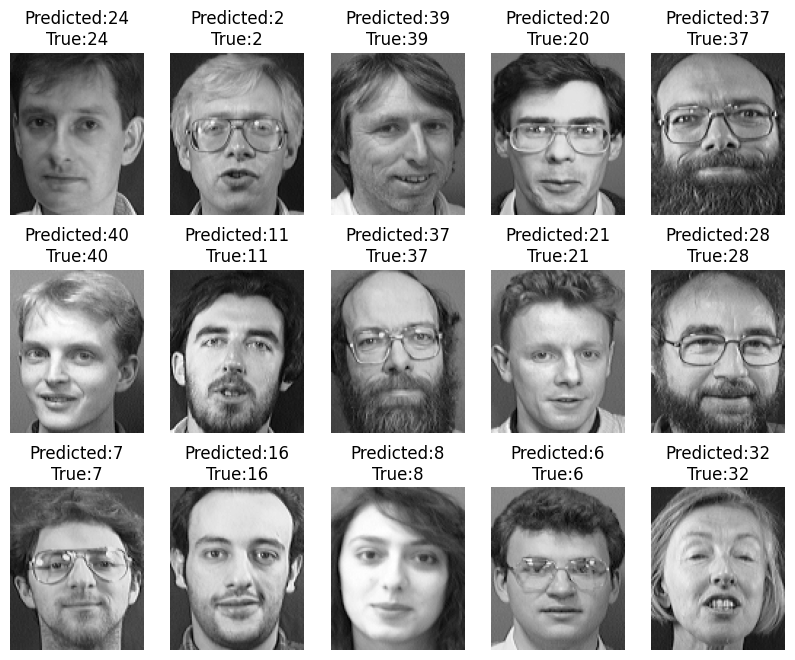

In [394]:
plt.figure(figsize=(10,8))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(X_test[i].reshape(112,92),cmap='gray')
  plt.title(f"Predicted:{y_pred[i]}\nTrue:{y_test[i]}")
  plt.axis('off')
plt.show()

In [400]:
from skimage.io import imread
from skimage.transform import resize

for test_label in ['23','12','5','40','35','10']:
  pgm_image_path = f'drive/MyDrive/ORL/s{test_label}/5.pgm'
  pgm_image = imread(pgm_image_path)

  flattened_image = [pgm_image.flatten()]
  image_pca = pca.transform(flattened_image)

  predicted_label = classifier_svc.predict(image_pca)
  print(f"Actual label: {test_label} Predicted label: {predicted_label[0]}")

Actual label: 23 Predicted label: 23
Actual label: 12 Predicted label: 12
Actual label: 5 Predicted label: 5
Actual label: 40 Predicted label: 40
Actual label: 35 Predicted label: 35
Actual label: 10 Predicted label: 10
